In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
bien1 = "manzana"
bien2 = "platano"

# terminos_de = input(
#     "Choose: \n [1] for Terminos en funcion de manzanas \n or \n [2] for terminos en funcion de platanos")

terminos_de = bien2
# B1 en funcion de B2 o al reves

# Domestico
L_disp_pais = 1200
L_req_pais_b1 = 3
L_req_pais_b2 = 2

# Extranjero
L_disp_extra = 800
L_req_extra_b1 = 5
L_req_extra_b2 = 1

# Cantidades Totales
# B1(Manzanas)
cant_tot_b1_pais = L_disp_pais / L_req_pais_b1
cant_tot_b1_extra = L_disp_extra / L_req_extra_b1
tot_b1 = cant_tot_b1_pais + cant_tot_b1_extra
# B2(Platanos)
cant_tot_b2_pais = L_disp_pais / L_req_pais_b2
cant_tot_b2_extra = L_disp_extra / L_req_extra_b2
tot_b2 = cant_tot_b2_pais + cant_tot_b2_extra

In [4]:
def cost_op(L_req_b1, L_req_b2, terminos_de):
    if terminos_de == bien2:
        # Costo de Oportunidad Bien1 en terminos del Bien2
        cost_oport = L_req_b1 / L_req_b2
        return cost_oport, bien1
    elif terminos_de == bien1:
        # Costo de Oportunidad Bien2 en terminos del Bien1
        cost_oport = L_req_b2 / L_req_b1
        return cost_oport, bien2

In [5]:
co_op_pais, bien_contrario = cost_op(L_req_pais_b1, L_req_pais_b2, terminos_de)
print("Costo de Oportunidad Domestico de {} en terminos de {}: {}".format(
    bien_contrario, terminos_de, co_op_pais))

co_op_extra, bien_contrario = cost_op(
    L_req_extra_b1, L_req_extra_b2, terminos_de)
print("Costo de Oportunidad Extranjero de {} en terminos de {}: {}".format(
    bien_contrario, terminos_de, co_op_extra))

Costo de Oportunidad Domestico de manzana en terminos de platano: 1.5
Costo de Oportunidad Extranjero de manzana en terminos de platano: 5.0


In [6]:
def fpp(L_disp, L_req_b1, L_req_b2, terminos_de):
    # B1 en terminos de B2
    if terminos_de == bien2:
        # Abscisa: L_disp / L_req_platano (unitario)
        # Ordenada: L_disp / L_req_manzana (unitario)
        abscisa = L_disp/L_req_b1
        ordenada = L_disp/L_req_b2

        # X que va del 0 a la anbsciza
        lista_bien1 = range(int(abscisa)+1)

        # Pendiente: y/x : 600/400
        pendiente = L_req_b1/L_req_b2

        # y = ordenada - pendiente * lista_bien1
        lista_bien2 = list()
        for n in lista_bien1:
            y = ordenada - pendiente * n
            lista_bien2.append(y)

        return lista_bien1, lista_bien2

    elif terminos_de == bien1:
        abscisa = L_disp/L_req_b2
        ordenada = L_disp/L_req_b1

        lista_bien2 = range(int(abscisa)+1)

        pendiente = L_req_b2/L_req_b1

        lista_bien1 = list()
        for n in lista_bien2:
            y = ordenada - pendiente * n
            lista_bien1.append(y)

        return lista_bien2, lista_bien1


In [7]:
if terminos_de == bien2:
    # Nacional
    lista_pais_bien1, lista_pais_bien2 = fpp(
        L_disp_pais, L_req_pais_b1, L_req_pais_b2, terminos_de)
    # Extranjero
    lista_extra_bien1, lista_extra_bien2 = fpp(
        L_disp_extra, L_req_extra_b1, L_req_extra_b2, terminos_de)

elif terminos_de == bien1:
    # Nacional
    lista_pais_bien1, lista_pais_bien2 = fpp(
        L_disp_pais, L_req_pais_b1, L_req_pais_b2, terminos_de)
    # Extranjero
    lista_extra_bien1, lista_extra_bien2 = fpp(
        L_disp_extra, L_req_extra_b1, L_req_extra_b2, terminos_de)

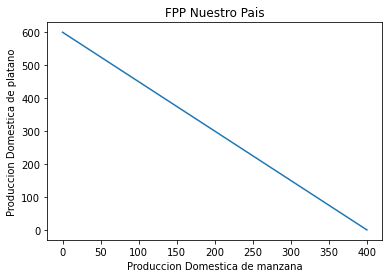

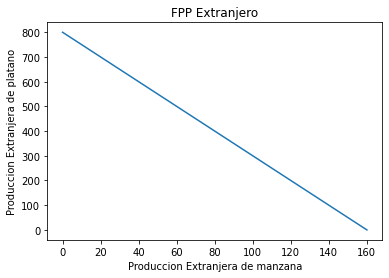

In [8]:

plt.plot(lista_pais_bien1, lista_pais_bien2)
plt.title("FPP Nuestro Pais")
plt.xlabel("Produccion Domestica de {}".format(bien_contrario))
plt.ylabel("Produccion Domestica de {}".format(terminos_de))
plt.show()


plt.plot(lista_extra_bien1, lista_extra_bien2)
plt.title("FPP Extranjero")
plt.xlabel("Produccion Extranjera de {}".format(bien_contrario))
plt.ylabel("Produccion Extranjera de {}".format(terminos_de))
plt.show()

In [9]:
def oferta_rel_mundial(co_op_pais, co_op_extra, cantidad_pais, cantidad_extranjero):
    cantidad_total = cantidad_pais + cantidad_extranjero
    # Listas
    precios_relativos = list()
    cantidades = list()

    # Pais con menor costo de oportunidad
    if co_op_pais < co_op_extra:
        cant_abajo = cantidad_pais
        cop_abajo = co_op_pais
        cop_arriba = co_op_extra
    else:
        cant_abajo = cantidad_extranjero
        cop_abajo = co_op_extra
        cop_arriba = co_op_pais

    for n in range(int(cantidad_total) + 1):
        cantidades.append(n)

    for n in cantidades:
        if n < cant_abajo:
            precios_relativos.append(cop_abajo)
        else:
            precios_relativos.append(cop_arriba)

    return cantidades, precios_relativos

Text(0, 0.5, 'Precio relativo')

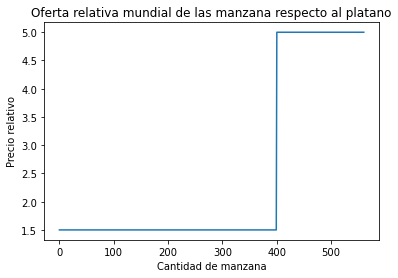

In [10]:
if terminos_de == bien2:
    cantidades, precios_relativos = oferta_rel_mundial(
        co_op_pais, co_op_extra, cant_tot_b1_pais, cant_tot_b1_extra)
elif terminos_de == bien1:
    cantidades, precios_relativos = oferta_rel_mundial(
        co_op_pais, co_op_extra, cant_tot_b2_pais, cant_tot_b2_extra)


plt.plot(cantidades, precios_relativos)
plt.title("Oferta relativa mundial de las {} respecto al {}".format(
    bien_contrario, terminos_de))
plt.xlabel("Cantidad de {}".format(bien_contrario))
plt.ylabel("Precio relativo")

In [11]:
def demanda_rel_mundial(co_op_pais, co_op_extra, cantidad_total):
    # B1 en terminos de B2
    # D = Demanda de manzanas/demanda de plátanos = precio de plátanos/precio de manzanas
    # D_rel en funcion de platanos = precio_relativo inverso
    demanda_rel = list()
    if terminos_de == bien2:
        c_total = cantidad_total
    elif terminos_de == bien1:
        c_total = tot_b2
    for n in np.arange(1, c_total):
        # cantidad relativa
        cr = n/cantidad_total
        demanda_rel.append(1/cr)

    return demanda_rel

Text(0, 0.5, 'Precio relativo')

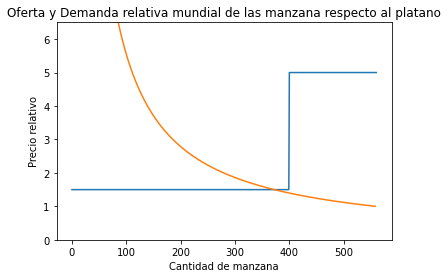

In [12]:
if terminos_de == bien2:
    cantidades, precios_relativos = oferta_rel_mundial(
        co_op_pais, co_op_extra, cant_tot_b1_pais, cant_tot_b1_extra)
elif terminos_de == bien1:
    cantidades, precios_relativos = oferta_rel_mundial(
        co_op_pais, co_op_extra, cant_tot_b2_pais, cant_tot_b2_extra)


# Demanda es la misma por la formula
demanda = demanda_rel_mundial(co_op_pais, co_op_extra, tot_b1)

limite = co_op_pais + co_op_extra
plt.plot(cantidades, precios_relativos)
plt.title("Oferta y Demanda relativa mundial de las {} respecto al {}".format(
    bien_contrario, terminos_de))
plt.plot(demanda)
plt.gca().set_ylim(0, limite)
plt.xlabel("Cantidad de {}".format(bien_contrario))
plt.ylabel("Precio relativo")

In [13]:
# RESUMEN

# Precios sin Comercio = (L/aLP) / (L/aLM)
precio_sin_com_pais = co_op_pais
precio_sin_com_extra = co_op_extra

# Precios con Comercio = (L/aLM) / (L/ aLP*)
if terminos_de == bien1:
    precio_com = (L_disp_pais/L_req_pais_b1) / (L_disp_extra/L_req_extra_b2)
elif terminos_de == bien2:
    precio_com = (L_disp_extra/L_req_extra_b2) / (L_disp_pais/L_req_pais_b1)

print("Precio Sin Comercio Domestico de {} en funcion de {}: {}".format(bien_contrario, terminos_de, precio_sin_com_pais))
print("Precio Sin Comercio Extranejero de {} en funcion de {}: {}".format(bien_contrario, terminos_de, precio_sin_com_extra))
print("")
print("Precio Comercial de {} en funcion de {}: {}".format(bien_contrario, terminos_de, precio_com))


Precio Sin Comercio Domestico de manzana en funcion de platano: 1.5
Precio Sin Comercio Extranejero de manzana en funcion de platano: 5.0

Precio Comercial de manzana en funcion de platano: 2.0
